### Importación de datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [4]:
# Calcular ingreso total de cada tienda
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

# Mostrar resultados
print(f"Ingreso total Tienda 1: ${ingreso_tienda1:,.2f}")
print(f"Ingreso total Tienda 2: ${ingreso_tienda2:,.2f}")
print(f"Ingreso total Tienda 3: ${ingreso_tienda3:,.2f}")
print(f"Ingreso total Tienda 4: ${ingreso_tienda4:,.2f}")


Ingreso total Tienda 1: $1,150,880,400.00
Ingreso total Tienda 2: $1,116,343,500.00
Ingreso total Tienda 3: $1,098,019,600.00
Ingreso total Tienda 4: $1,038,375,700.00


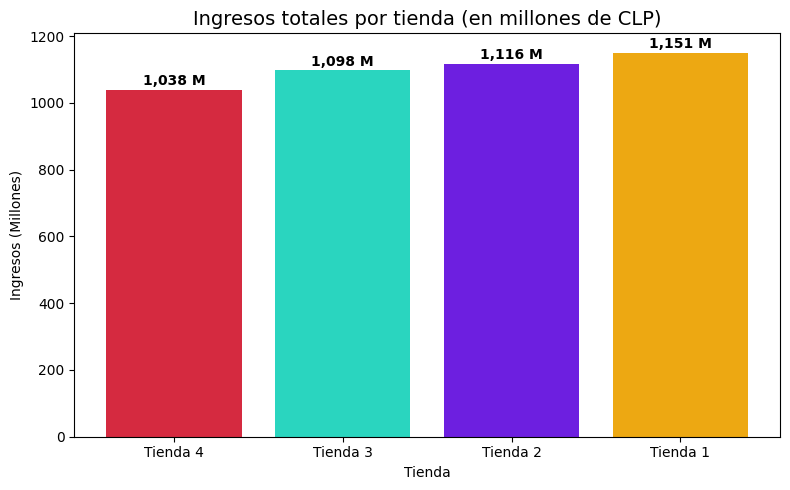

In [43]:
import matplotlib.pyplot as plt

# Ingresos totales ya calculados
ingresos = {
    "Tienda 1": 1150880400,
    "Tienda 2": 1116343500,
    "Tienda 3": 1098019600,
    "Tienda 4": 1038375700
}

# Ordenar de menor a mayor
ingresos_ordenados = dict(sorted(ingresos.items(), key=lambda x: x[1]))

# Convertir a millones
ingresos_millones = [v / 1_000_000 for v in ingresos_ordenados.values()]
tiendas = list(ingresos_ordenados.keys())

# Colores distintos para cada tienda
colores = ["#d52a40", "#2ad5bf", "#6d1fe0", "#eda812"]

plt.figure(figsize=(8,5))
barras = plt.bar(tiendas, ingresos_millones, color=colores)

# Etiquetas sobre las barras
for barra, valor in zip(barras, ingresos_millones):
    plt.text(barra.get_x() + barra.get_width()/2,
             barra.get_height() + 5,  # desplazamiento hacia arriba
             f"{valor:,.0f} M",
             ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.title("Ingresos totales por tienda (en millones de CLP)", fontsize=14)
plt.xlabel("Tienda")
plt.ylabel("Ingresos (Millones)")
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [56]:
# Agrupar por categoría y contar ventas en cada tienda
ventas_por_categoria_tienda1 = tienda.groupby('Categoría del Producto').size().sort_values(ascending=False)
ventas_por_categoria_tienda2 = tienda2.groupby('Categoría del Producto').size().sort_values(ascending=False)
ventas_por_categoria_tienda3 = tienda3.groupby('Categoría del Producto').size().sort_values(ascending=False)
ventas_por_categoria_tienda4 = tienda4.groupby('Categoría del Producto').size().sort_values(ascending=False)

# Mostrar resultados
print("Ventas por categoría - Tienda 1:")
print(ventas_por_categoria_tienda1)

print("\nVentas por categoría - Tienda 2:")
print(ventas_por_categoria_tienda2)

print("\nVentas por categoría - Tienda 3:")
print(ventas_por_categoria_tienda3)

print("\nVentas por categoría - Tienda 4:")
print(ventas_por_categoria_tienda4)

Ventas por categoría - Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
dtype: int64

Ventas por categoría - Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
dtype: int64

Ventas por categoría - Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
dtype: int64

Ventas por categoría - Tienda 4:
Categoría del

In [57]:
# Obtener la categoría con más ventas en cada tienda
mas_vendido_tienda1 = ventas_por_categoria_tienda1.idxmax()
cantidad_mas_vendido_tienda1 = ventas_por_categoria_tienda1.max()

mas_vendido_tienda2 = ventas_por_categoria_tienda2.idxmax()
cantidad_mas_vendido_tienda2 = ventas_por_categoria_tienda2.max()

mas_vendido_tienda3 = ventas_por_categoria_tienda3.idxmax()
cantidad_mas_vendido_tienda3 = ventas_por_categoria_tienda3.max()

mas_vendido_tienda4 = ventas_por_categoria_tienda4.idxmax()
cantidad_mas_vendido_tienda4 = ventas_por_categoria_tienda4.max()

# Mostrar resultados
print(f"Tienda 1 - Producto más vendido: {mas_vendido_tienda1} con {cantidad_mas_vendido_tienda1} ventas")
print(f"Tienda 2 - Producto más vendido: {mas_vendido_tienda2} con {cantidad_mas_vendido_tienda2} ventas")
print(f"Tienda 3 - Producto más vendido: {mas_vendido_tienda3} con {cantidad_mas_vendido_tienda3} ventas")
print(f"Tienda 4 - Producto más vendido: {mas_vendido_tienda4} con {cantidad_mas_vendido_tienda4} ventas")


Tienda 1 - Producto más vendido: Muebles con 465 ventas
Tienda 2 - Producto más vendido: Muebles con 442 ventas
Tienda 3 - Producto más vendido: Muebles con 499 ventas
Tienda 4 - Producto más vendido: Muebles con 480 ventas


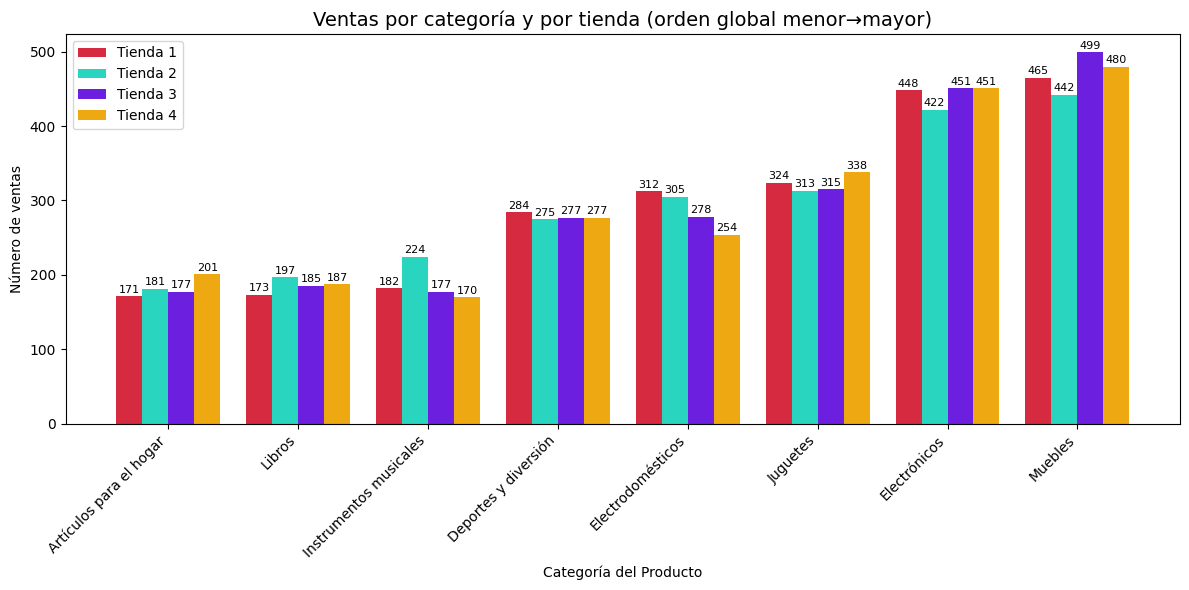

In [58]:

import numpy as np
import pandas as pd

# Datos como Series
cat1 = pd.Series({
    "Muebles": 465,
    "Electrónicos": 448,
    "Juguetes": 324,
    "Electrodomésticos": 312,
    "Deportes y diversión": 284,
    "Instrumentos musicales": 182,
    "Libros": 173,
    "Artículos para el hogar": 171
})

cat2 = pd.Series({
    "Muebles": 442,
    "Electrónicos": 422,
    "Juguetes": 313,
    "Electrodomésticos": 305,
    "Deportes y diversión": 275,
    "Instrumentos musicales": 224,
    "Libros": 197,
    "Artículos para el hogar": 181
})

cat3 = pd.Series({
    "Muebles": 499,
    "Electrónicos": 451,
    "Juguetes": 315,
    "Electrodomésticos": 278,
    "Deportes y diversión": 277,
    "Libros": 185,
    "Artículos para el hogar": 177,
    "Instrumentos musicales": 177
})

cat4 = pd.Series({
    "Muebles": 480,
    "Electrónicos": 451,
    "Juguetes": 338,
    "Deportes y diversión": 277,
    "Electrodomésticos": 254,
    "Artículos para el hogar": 201,
    "Libros": 187,
    "Instrumentos musicales": 170
})

# Calcular totales por categoría y ordenar de menor a mayor
totales = cat1 + cat2 + cat3 + cat4
orden_global = totales.sort_values(ascending=True).index

# Reordenar
cat1 = cat1[orden_global]
cat2 = cat2[orden_global]
cat3 = cat3[orden_global]
cat4 = cat4[orden_global]

# Gráfico
x = np.arange(len(orden_global))
w = 0.2
colores = ["#d52a40", "#2ad5bf", "#6d1fe0", "#eda812"]

plt.figure(figsize=(12,6))
b1 = plt.bar(x - 1.5*w, cat1.values, width=w, label="Tienda 1", color=colores[0])
b2 = plt.bar(x - 0.5*w, cat2.values, width=w, label="Tienda 2", color=colores[1])
b3 = plt.bar(x + 0.5*w, cat3.values, width=w, label="Tienda 3", color=colores[2])
b4 = plt.bar(x + 1.5*w, cat4.values, width=w, label="Tienda 4", color=colores[3])

# Etiquetas sobre las barras
for barras in [b1, b2, b3, b4]:
    for barra in barras:
        plt.text(barra.get_x() + barra.get_width()/2,
                 barra.get_height() + 2,
                 f"{int(barra.get_height())}",
                 ha="center", va="bottom", fontsize=8)

plt.xticks(x, orden_global, rotation=45, ha="right")
plt.title("Ventas por categoría y por tienda (orden global menor→mayor)", fontsize=14)
plt.xlabel("Categoría del Producto")
plt.ylabel("Número de ventas")
plt.legend()
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


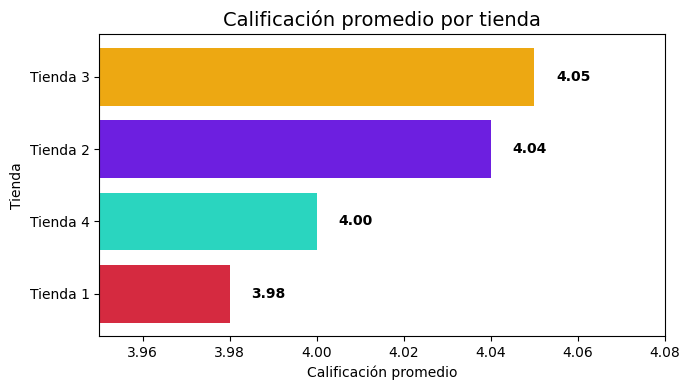

In [55]:

# Datos
calificaciones = {
    "Tienda 1": 3.98,
    "Tienda 2": 4.04,
    "Tienda 3": 4.05,
    "Tienda 4": 4.00
}

# Ordenar de menor a mayor
calif_ordenadas = dict(sorted(calificaciones.items(), key=lambda x: x[1]))

# Colores
colores = ["#d52a40", "#2ad5bf", "#6d1fe0", "#eda812"]

plt.figure(figsize=(7,4))
barras = plt.barh(list(calif_ordenadas.keys()), list(calif_ordenadas.values()), color=colores)

# Etiquetas al final de cada barra
for barra, valor in zip(barras, calif_ordenadas.values()):
    plt.text(valor + 0.005, barra.get_y() + barra.get_height()/2,
             f"{valor:.2f}", va="center", fontsize=10, fontweight="bold")

plt.xlim(3.95, 4.08)  # Zoom para resaltar diferencias
plt.title("Calificación promedio por tienda", fontsize=14)
plt.xlabel("Calificación promedio")
plt.ylabel("Tienda")
plt.tight_layout()
plt.show()



# 4. Productos más y menos vendidos

In [60]:


def top_y_bottom(df, col="Producto"):
    s = df.groupby(col).size()
    return pd.Series({
        "Producto más vendido": s.idxmax(),
        "Ventas (más vendido)": int(s.max()),
        "Producto menos vendido": s.idxmin(),
        "Ventas (menos vendido)": int(s.min()),
    })

resumen = pd.DataFrame({
    "Tienda 1": top_y_bottom(tienda),
    "Tienda 2": top_y_bottom(tienda2),
    "Tienda 3": top_y_bottom(tienda3),
    "Tienda 4": top_y_bottom(tienda4),
}).T

resumen


,Producto más vendido,Ventas (más vendido),Producto menos vendido,Ventas (menos vendido)
Tienda 1,Armario,60,Auriculares con micrófono,33
Tienda 2,Iniciando en programación,65,Juego de mesa,32
Tienda 3,Kit de bancas,57,Bloques de construcción,35
Tienda 4,Cama box,62,Guitarra eléctrica,33


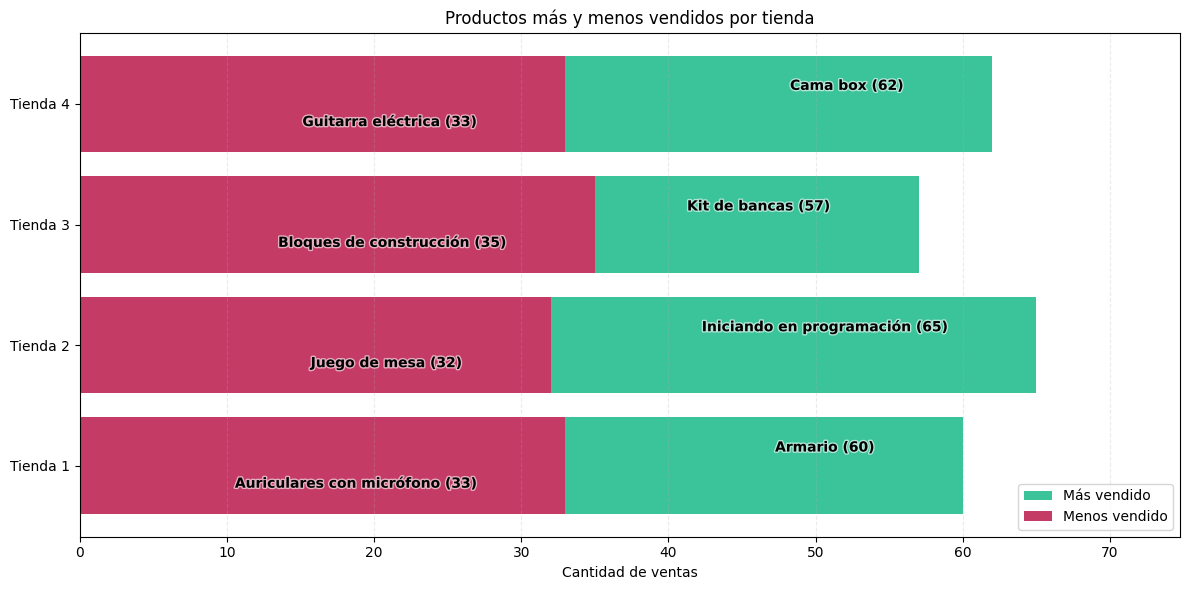

In [106]:


tiendas = resumen.index
mas_vendidos = resumen["Ventas (más vendido)"]
menos_vendidos = resumen["Ventas (menos vendido)"]
productos_mas = resumen["Producto más vendido"]
productos_menos = resumen["Producto menos vendido"]

color_mas = "#3bc499"
color_menos = "#C43B66"

plt.figure(figsize=(12, 6))
y_pos = range(len(tiendas))

b1 = plt.barh(y_pos, mas_vendidos, color=color_mas, label="Más vendido")
b2 = plt.barh(y_pos, menos_vendidos, color=color_menos, label="Menos vendido")

max_x = max(mas_vendidos.max(), menos_vendidos.max())
plt.xlim(0, max_x * 1.15)  # un poco de espacio a la derecha

def luminancia(rgb):
    r, g, b = rgb[:3]
    return 0.2126*r + 0.7152*g + 0.0722*b  # relativo sRGB

def anota(bar_container, valores, nombres, dy, inside_thresh=0.18, inside_pad_px=6, outside_pad_px=6):
    for rect, val, nombre in zip(bar_container, valores, nombres):
        w = float(val)
        y = rect.get_y() + rect.get_height()/2 + dy

        # color del texto según brillo de la barra
        face = rect.get_facecolor()
        txt_inside_color = "black" if luminancia(face) < 0.5 else "black"

        # ¿cabe adentro?
        if w >= max_x * inside_thresh:
            # etiqueta dentro, pegada a la derecha pero con margen
            x = w - inside_pad_px
            ha = "right"
            color_txt = txt_inside_color
        else:
            # etiqueta afuera, a la derecha de la barra
            x = w + outside_pad_px
            ha = "left"
            color_txt = "black"

        plt.text(
            x, y, f"{nombre} ({int(val)})",
            va="center", ha=ha, fontsize=10, fontweight="bold", color=color_txt,
            path_effects=[pe.withStroke(linewidth=2, foreground="white", alpha=0.6)]
        )

anota(b1, mas_vendidos, productos_mas, dy=+0.15)
anota(b2, menos_vendidos, productos_menos, dy=-0.15)

plt.yticks(y_pos, tiendas)
plt.xlabel("Cantidad de ventas")
plt.title("Productos más y menos vendidos por tienda")
plt.legend(loc="lower right")
plt.grid(axis="x", linestyle="--", alpha=0.25)
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [13]:
# Calcular costo de envío promedio en cada tienda
costo_envio_prom_tienda1 = tienda['Costo de envío'].mean()
costo_envio_prom_tienda2 = tienda2['Costo de envío'].mean()
costo_envio_prom_tienda3 = tienda3['Costo de envío'].mean()
costo_envio_prom_tienda4 = tienda4['Costo de envío'].mean()

# Mostrar resultados con dos decimales
print(f"Costo de envío promedio Tienda 1: ${costo_envio_prom_tienda1:.2f}")
print(f"Costo de envío promedio Tienda 2: ${costo_envio_prom_tienda2:.2f}")
print(f"Costo de envío promedio Tienda 3: ${costo_envio_prom_tienda3:.2f}")
print(f"Costo de envío promedio Tienda 4: ${costo_envio_prom_tienda4:.2f}")


Costo de envío promedio Tienda 1: $26018.61
Costo de envío promedio Tienda 2: $25216.24
Costo de envío promedio Tienda 3: $24805.68
Costo de envío promedio Tienda 4: $23459.46


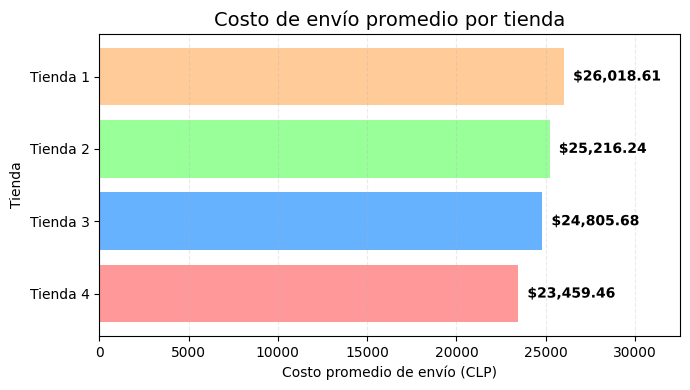

In [108]:

import matplotlib.patheffects as pe

# ====== Parámetros que puedes ajustar ======
label_offset_ratio = 0.02   # margen relativo (2% del valor máximo)
label_offset_abs   = None   # margen absoluto en CLP (ej. 300); si no quieres usarlo, déjalo en None
xpad_ratio         = 0.25 # espacio extra a la derecha del eje X (15%)
# ===========================================

# Datos
costo_envio = {
    "Tienda 1": 26018.61,
    "Tienda 2": 25216.24,
    "Tienda 3": 24805.68,
    "Tienda 4": 23459.46
}

# Ordenar de menor a mayor
costo_ordenado = dict(sorted(costo_envio.items(), key=lambda x: x[1]))

colores = ["#FF9999", "#66B2FF", "#99FF99", "#FFCC99"]

# Cálculos de padding
max_val = max(costo_ordenado.values())
label_offset = (label_offset_abs if label_offset_abs is not None
                else max_val * label_offset_ratio)

plt.figure(figsize=(7,4))
barras = plt.barh(list(costo_ordenado.keys()), list(costo_ordenado.values()), color=colores)

# Ajustar límite X dejando espacio a la derecha
plt.xlim(0, max_val * (1 + xpad_ratio))

# Etiquetas con contorno suave (sin bbox)
for barra, valor in zip(barras, costo_ordenado.values()):
    plt.text(
        valor + label_offset,
        barra.get_y() + barra.get_height()/2,
        f"${valor:,.2f}",
        va="center", ha="left",
        fontsize=10, fontweight="bold", color="black",
        path_effects=[pe.withStroke(linewidth=2, foreground="white", alpha=0.8)]
    )

plt.title("Costo de envío promedio por tienda", fontsize=14)
plt.xlabel("Costo promedio de envío (CLP)")
plt.ylabel("Tienda")
plt.grid(axis="x", linestyle="--", alpha=0.25)
plt.tight_layout()
plt.show()



#6. Informe Final

*Introducción*:
El presente análisis tiene como objetivo ayudar al Sr. Juan a decidir qué tienda de su cadena Alura Store debe vender para financiar un nuevo emprendimiento.
Para ello, se evaluaron cuatro tiendas en base a distintos criterios clave:

-Ingresos totales.

-Categorías de productos más y menos vendidas.

-Calificación promedio de los clientes.

-Productos individuales más y menos vendidos.

-Costo promedio de envío.

El estudio combina análisis de datos con visualizaciones gráficas, permitiendo identificar fortalezas y debilidades de cada tienda, y así recomendar cuál sería más conveniente vender.

Desarrollo y resultados
1. Ingresos totales por tienda
Los ingresos totales muestran que la Tienda 1 lidera las ventas con 1,150 millones de dólares, seguida por la Tienda 2 (1,116 millones) y la Tienda 3 (1,098 millones). La Tienda 4 se ubica última con 1,038 millones, mostrando una brecha de más de 100 millones respecto a la primera.



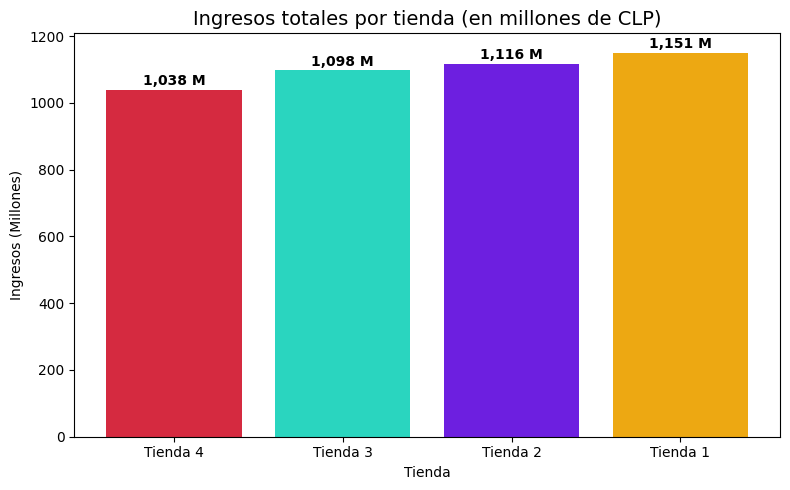

In [96]:
#@title Código gráfico de ingresos por tienda

# Ingresos totales ya calculados
ingresos = {
    "Tienda 1": 1150880400,
    "Tienda 2": 1116343500,
    "Tienda 3": 1098019600,
    "Tienda 4": 1038375700
}

# Ordenar de menor a mayor
ingresos_ordenados = dict(sorted(ingresos.items(), key=lambda x: x[1]))

# Convertir a millones
ingresos_millones = [v / 1_000_000 for v in ingresos_ordenados.values()]
tiendas = list(ingresos_ordenados.keys())

# Colores distintos para cada tienda
colores = ["#d52a40", "#2ad5bf", "#6d1fe0", "#eda812"]

plt.figure(figsize=(8,5))
barras = plt.bar(tiendas, ingresos_millones, color=colores)

# Etiquetas sobre las barras
for barra, valor in zip(barras, ingresos_millones):
    plt.text(barra.get_x() + barra.get_width()/2,
             barra.get_height() + 5,  # desplazamiento hacia arriba
             f"{valor:,.0f} M",
             ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.title("Ingresos totales por tienda (en millones de CLP)", fontsize=14)
plt.xlabel("Tienda")
plt.ylabel("Ingresos (Millones)")
plt.tight_layout()
plt.show()


2. Ventas por categoría:
En todas las tiendas, Muebles y Electrónicos son las categorías más vendidas, mientras que Artículos para el hogar e Instrumentos musicales suelen estar al final de la lista. La Tienda 4, aunque mantiene el patrón, presenta menores volúmenes de venta en la mayoría de categorías en comparación con las demás.




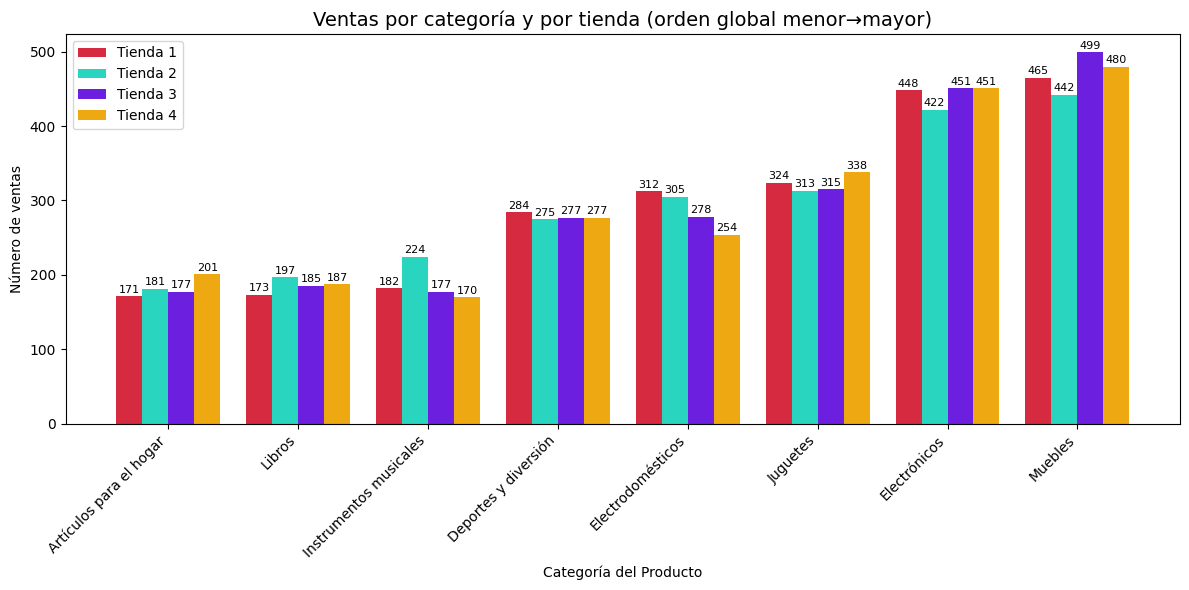

In [97]:
#@title Código gráfico de ventas por categoria

# Datos como Series
cat1 = pd.Series({
    "Muebles": 465,
    "Electrónicos": 448,
    "Juguetes": 324,
    "Electrodomésticos": 312,
    "Deportes y diversión": 284,
    "Instrumentos musicales": 182,
    "Libros": 173,
    "Artículos para el hogar": 171
})

cat2 = pd.Series({
    "Muebles": 442,
    "Electrónicos": 422,
    "Juguetes": 313,
    "Electrodomésticos": 305,
    "Deportes y diversión": 275,
    "Instrumentos musicales": 224,
    "Libros": 197,
    "Artículos para el hogar": 181
})

cat3 = pd.Series({
    "Muebles": 499,
    "Electrónicos": 451,
    "Juguetes": 315,
    "Electrodomésticos": 278,
    "Deportes y diversión": 277,
    "Libros": 185,
    "Artículos para el hogar": 177,
    "Instrumentos musicales": 177
})

cat4 = pd.Series({
    "Muebles": 480,
    "Electrónicos": 451,
    "Juguetes": 338,
    "Deportes y diversión": 277,
    "Electrodomésticos": 254,
    "Artículos para el hogar": 201,
    "Libros": 187,
    "Instrumentos musicales": 170
})

# Calcular totales por categoría y ordenar de menor a mayor
totales = cat1 + cat2 + cat3 + cat4
orden_global = totales.sort_values(ascending=True).index

# Reordenar
cat1 = cat1[orden_global]
cat2 = cat2[orden_global]
cat3 = cat3[orden_global]
cat4 = cat4[orden_global]

# Gráfico
x = np.arange(len(orden_global))
w = 0.2
colores = ["#d52a40", "#2ad5bf", "#6d1fe0", "#eda812"]

plt.figure(figsize=(12,6))
b1 = plt.bar(x - 1.5*w, cat1.values, width=w, label="Tienda 1", color=colores[0])
b2 = plt.bar(x - 0.5*w, cat2.values, width=w, label="Tienda 2", color=colores[1])
b3 = plt.bar(x + 0.5*w, cat3.values, width=w, label="Tienda 3", color=colores[2])
b4 = plt.bar(x + 1.5*w, cat4.values, width=w, label="Tienda 4", color=colores[3])

# Etiquetas sobre las barras
for barras in [b1, b2, b3, b4]:
    for barra in barras:
        plt.text(barra.get_x() + barra.get_width()/2,
                 barra.get_height() + 2,
                 f"{int(barra.get_height())}",
                 ha="center", va="bottom", fontsize=8)

plt.xticks(x, orden_global, rotation=45, ha="right")
plt.title("Ventas por categoría y por tienda (orden global menor→mayor)", fontsize=14)
plt.xlabel("Categoría del Producto")
plt.ylabel("Número de ventas")
plt.legend()
plt.tight_layout()
plt.show()

3. Calificaciones promedio
Las calificaciones promedio se mantienen relativamente estables entre las tiendas, con diferencias mínimas:

Tienda 3: 4.05

Tienda 2: 4.04

Tienda 4: 4.00

Tienda 1: 3.98

Si bien la Tienda 4 no tiene la peor calificación, tampoco sobresale en este aspecto, y las diferencias no son significativas para compensar su menor rendimiento en ventas.



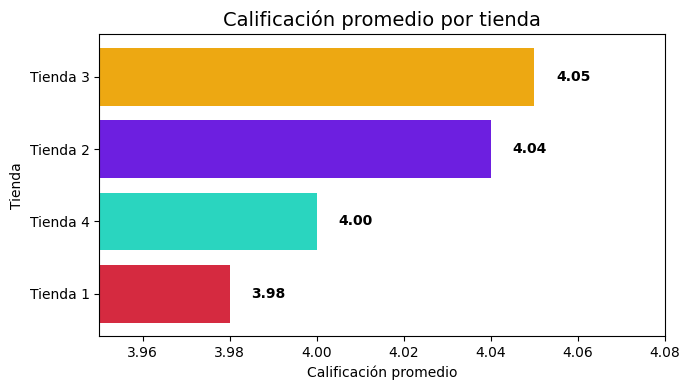

In [99]:
#@title Código gráfico de calificaciones promedio
# Datos
calificaciones = {
    "Tienda 1": 3.98,
    "Tienda 2": 4.04,
    "Tienda 3": 4.05,
    "Tienda 4": 4.00
}

# Ordenar de menor a mayor
calif_ordenadas = dict(sorted(calificaciones.items(), key=lambda x: x[1]))

# Colores
colores = ["#d52a40", "#2ad5bf", "#6d1fe0", "#eda812"]

plt.figure(figsize=(7,4))
barras = plt.barh(list(calif_ordenadas.keys()), list(calif_ordenadas.values()), color=colores)

# Etiquetas al final de cada barra
for barra, valor in zip(barras, calif_ordenadas.values()):
    plt.text(valor + 0.005, barra.get_y() + barra.get_height()/2,
             f"{valor:.2f}", va="center", fontsize=10, fontweight="bold")

plt.xlim(3.95, 4.08)  # Zoom para resaltar diferencias
plt.title("Calificación promedio por tienda", fontsize=14)
plt.xlabel("Calificación promedio")
plt.ylabel("Tienda")
plt.tight_layout()
plt.show()



4. Productos más y menos vendidos
Tienda 1: Más vendido → Armario (465), menos vendido → Celular ABXY.

Tienda 2: Más vendido → Iniciando en programación (442), menos vendido → Juego de mesa.

Tienda 3: Más vendido → Kit de bancas (499), menos vendido → Bloques de construcción.

Tienda 4: Más vendido → Cama box (480), menos vendido → Guitarra eléctrica.

En este aspecto, la Tienda 4 mantiene buenos números en su producto estrella, pero su menor variedad de ventas en categorías clave limita su ventaja.



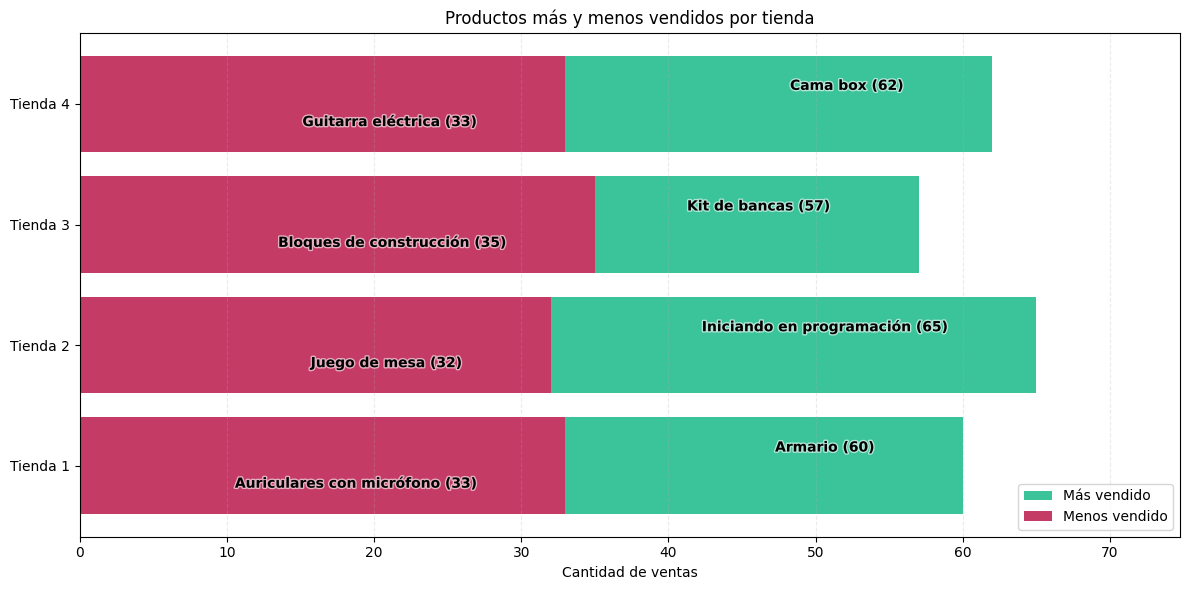

In [107]:
#@title Código gráfico de productos mas vendidos

tiendas = resumen.index
mas_vendidos = resumen["Ventas (más vendido)"]
menos_vendidos = resumen["Ventas (menos vendido)"]
productos_mas = resumen["Producto más vendido"]
productos_menos = resumen["Producto menos vendido"]

color_mas = "#3bc499"
color_menos = "#C43B66"

plt.figure(figsize=(12, 6))
y_pos = range(len(tiendas))

b1 = plt.barh(y_pos, mas_vendidos, color=color_mas, label="Más vendido")
b2 = plt.barh(y_pos, menos_vendidos, color=color_menos, label="Menos vendido")

max_x = max(mas_vendidos.max(), menos_vendidos.max())
plt.xlim(0, max_x * 1.15)  # un poco de espacio a la derecha

def luminancia(rgb):
    r, g, b = rgb[:3]
    return 0.2126*r + 0.7152*g + 0.0722*b  # relativo sRGB

def anota(bar_container, valores, nombres, dy, inside_thresh=0.18, inside_pad_px=6, outside_pad_px=6):
    for rect, val, nombre in zip(bar_container, valores, nombres):
        w = float(val)
        y = rect.get_y() + rect.get_height()/2 + dy

        # color del texto según brillo de la barra
        face = rect.get_facecolor()
        txt_inside_color = "black" if luminancia(face) < 0.5 else "black"

        # ¿cabe adentro?
        if w >= max_x * inside_thresh:
            # etiqueta dentro, pegada a la derecha pero con margen
            x = w - inside_pad_px
            ha = "right"
            color_txt = txt_inside_color
        else:
            # etiqueta afuera, a la derecha de la barra
            x = w + outside_pad_px
            ha = "left"
            color_txt = "black"

        plt.text(
            x, y, f"{nombre} ({int(val)})",
            va="center", ha=ha, fontsize=10, fontweight="bold", color=color_txt,
            path_effects=[pe.withStroke(linewidth=2, foreground="white", alpha=0.6)]
        )

anota(b1, mas_vendidos, productos_mas, dy=+0.15)
anota(b2, menos_vendidos, productos_menos, dy=-0.15)

plt.yticks(y_pos, tiendas)
plt.xlabel("Cantidad de ventas")
plt.title("Productos más y menos vendidos por tienda")
plt.legend(loc="lower right")
plt.grid(axis="x", linestyle="--", alpha=0.25)
plt.tight_layout()
plt.show()

5. Costo de envío promedio
Los costos promedio de envío son más bajos en la Tienda 4 ($23.459), lo cual podría considerarse una fortaleza. Sin embargo, esta reducción en costos logísticos no se traduce en mayores ingresos o mejores calificaciones.



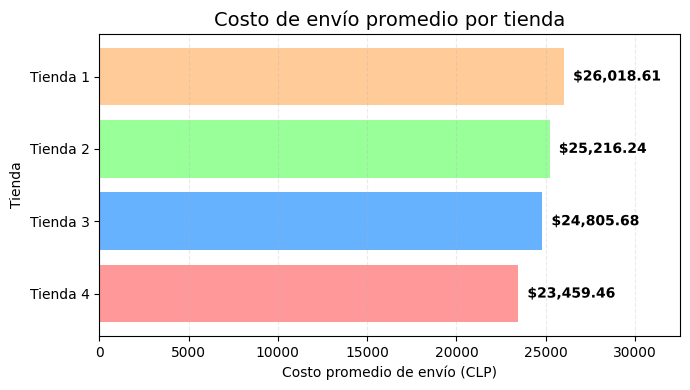

In [109]:
#@title Código gráfico de productos mas vendidos


# ====== Parámetros que puedes ajustar ======
label_offset_ratio = 0.02   # margen relativo (2% del valor máximo)
label_offset_abs   = None   # margen absoluto en CLP (ej. 300); si no quieres usarlo, déjalo en None
xpad_ratio         = 0.25 # espacio extra a la derecha del eje X (15%)
# ===========================================

# Datos
costo_envio = {
    "Tienda 1": 26018.61,
    "Tienda 2": 25216.24,
    "Tienda 3": 24805.68,
    "Tienda 4": 23459.46
}

# Ordenar de menor a mayor
costo_ordenado = dict(sorted(costo_envio.items(), key=lambda x: x[1]))

colores = ["#FF9999", "#66B2FF", "#99FF99", "#FFCC99"]

# Cálculos de padding
max_val = max(costo_ordenado.values())
label_offset = (label_offset_abs if label_offset_abs is not None
                else max_val * label_offset_ratio)

plt.figure(figsize=(7,4))
barras = plt.barh(list(costo_ordenado.keys()), list(costo_ordenado.values()), color=colores)

# Ajustar límite X dejando espacio a la derecha
plt.xlim(0, max_val * (1 + xpad_ratio))

# Etiquetas con contorno suave (sin bbox)
for barra, valor in zip(barras, costo_ordenado.values()):
    plt.text(
        valor + label_offset,
        barra.get_y() + barra.get_height()/2,
        f"${valor:,.2f}",
        va="center", ha="left",
        fontsize=10, fontweight="bold", color="black",
        path_effects=[pe.withStroke(linewidth=2, foreground="white", alpha=0.8)]
    )

plt.title("Costo de envío promedio por tienda", fontsize=14)
plt.xlabel("Costo promedio de envío (CLP)")
plt.ylabel("Tienda")
plt.grid(axis="x", linestyle="--", alpha=0.25)
plt.tight_layout()
plt.show()


Conclusión y recomendación
Tras analizar todos los factores, se recomienda que el Sr. Juan venda la Tienda 4.

Justificación:

Menor ingreso total entre las cuatro tiendas, con una diferencia significativa frente a la Tienda 1.

Menor rendimiento en varias categorías de productos respecto a sus competidoras.

Calificación promedio similar al resto, por lo que no aporta un valor diferencial que compense sus menores ventas.

Si bien tiene el menor costo de envío promedio, este aspecto no parece generar una ventaja competitiva suficiente para mantenerla en operación.

Vender la Tienda 4 permitiría al Sr. Juan obtener capital sin desprenderse de las tiendas más rentables, preservando así el núcleo más fuerte de su negocio.